# Ejercicio proyecto: Desarrollo de Soluciones en IA training - Reto proyecto 1. Entrena una red neuronal convolucional (CNN) utilizando PyTorch
## Autor: Sergio Fernández Munguía
### 1. Preparación del entorno

In [3]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision

### 2. Cargar y visualizar las imágenes

In [4]:
basic_transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor()
])

train_dataset = datasets.ImageFolder('images/seg_train', transform=basic_transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

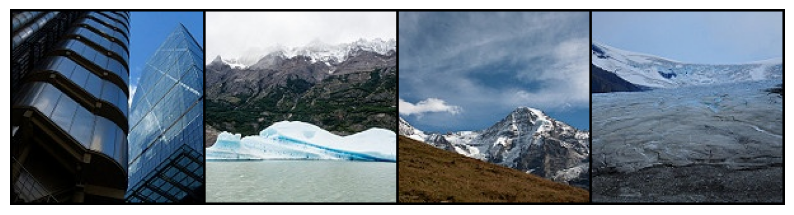

In [5]:
# Visualizar imágenes
def imshow_batch(loader):
    dataiter = iter(loader)
    images, labels = next(dataiter)
    img_grid = torchvision.utils.make_grid(images)
    plt.figure(figsize=(10,4))
    plt.imshow(img_grid.permute(1, 2, 0))
    plt.axis('off')
    plt.show()

imshow_batch(train_loader)

### 3. Aumento de imágenes

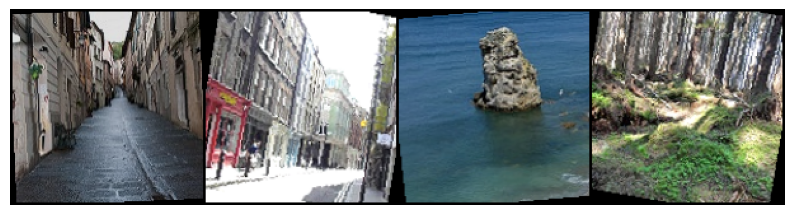

In [7]:
augmented_transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2),
    transforms.RandomResizedCrop(150, scale=(0.8, 1.0)),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor()
])

aug_dataset = datasets.ImageFolder('images/seg_train', transform=augmented_transform)
aug_loader = DataLoader(aug_dataset, batch_size=4, shuffle=True)

# Visualiza las imágenes aumentadas
imshow_batch(aug_loader)

### 4. Definir la red convolucional

In [8]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 37 * 37, 128)
        self.fc2 = nn.Linear(128, 6)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # [B, 16, 75, 75]
        x = self.pool(F.relu(self.conv2(x)))  # [B, 32, 37, 37]
        x = x.view(-1, 32 * 37 * 37)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

### 5. Entrenar el modelo

In [ ]:
import torch
from torch import optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.01)

# Entrenamiento
for epoch in range(30):
    running_loss = 0.0
    model.train()
    for images, labels in aug_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Época {epoch+1}, Pérdida: {running_loss / len(aug_loader):.4f}")

Época 1, Pérdida: 0.0019
Época 2, Pérdida: 0.0003
Época 3, Pérdida: 0.0003
Época 4, Pérdida: 0.0003
Época 5, Pérdida: 0.0003
Época 6, Pérdida: 0.0003
Época 7, Pérdida: 0.0003
Época 8, Pérdida: 0.0003
Época 9, Pérdida: 0.0003
Época 10, Pérdida: 0.0003
Época 11, Pérdida: 0.0003
Época 12, Pérdida: 0.0003
Época 13, Pérdida: 0.0003
Época 14, Pérdida: 0.0003
Época 15, Pérdida: 0.0003


### 6. Evaluación del modelo

In [ ]:
# Dataset sin aumento para validación
test_dataset = datasets.ImageFolder('images/seg_test', transform=basic_transform)
test_loader = DataLoader(test_dataset, batch_size=32)

correct = 0
total = 0
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Precisión en conjunto de prueba: {accuracy:.2f}%')